# Final Project
Dennis Cruz - dec2174

## Model Fitting using astropy.modeling

Adapted from:

Rocio Kiman, Lia Corrales, Zé Vinícius, Kelle Cruz, Stephanie T. Douglas
// The Astropy Project

https://learn.astropy.org/tutorials/Models-Quick-Fit.html

### Objectives:
* Learn about different types of models available in astropy, and create a guide that can serve as reference for future students that might be intrigued about modeling data.
* Learn common functions and fitters within astropy, and determine how and when to use the most appropiate one, depending on the function and the data we retrieve.
* Plotting and analyzing data and models usind matplotlib, checking the appropiateness of the models as well as the accuracy of the different fits.
* Compare different models and fitters, and explain what they work best with.

### Summary

The purpose of this project is to become familiar with models available in __astropy.modeling__ and learn how to make a fit to obtained data. This can serve as a teaching tool for students as well as an expansion of knowledge for astronomer enthusiats in classrooms

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize
# Make plots display in notebooks
%matplotlib inline 

### 1) Fit a Linear model: Three steps to fit data using astropy.modeling


In [2]:
# Importing data from Vizier
catalog = Vizier.get_catalogs('J/A+A/605/A100')

# More about Vizier on adjuct paper

In [3]:
# Selecting periods and magnitudes

period = np.array(catalog[0]['Period'])        # obtaining periods into an array
log_period = np.log10(period)                  # transforming periods in log base 10
k_mag = np.array(catalog[0]['__Ksmag_'])       # magnitudes turned into arrays
k_mag_err = np.array(catalog[0]['e__Ksmag_'])  # error in magnitudes

Text(0, 0.5, 'Ks')

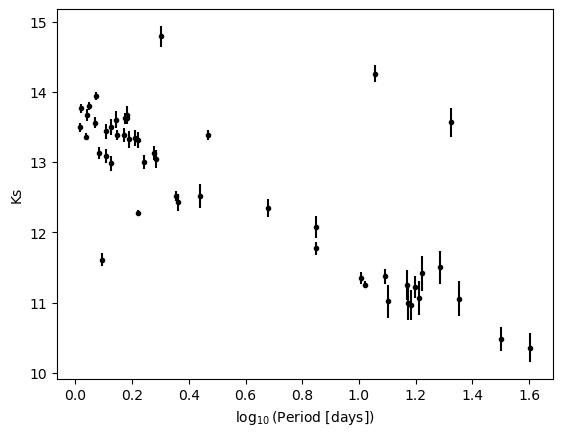

In [4]:
# Plotting data

plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

### Models in Astropy

Models in Astropy are known parametrized functions. With this format they are easy to define and to use, given that we do not need to write the function expression every time we want to use a model, just the name. They can be linear or non-linear in the variables. Some examples of models are:

* Gaussian1D
* Trapezoid1D
* Polynomial1D
* Sine1D
* Linear1D
* and more

*more information about __models__ can be found in the adjunct paper*

### Fitters in Astropy

Fitters in Astropy are the classes resposable for making the fit. They can be linear or non-linear in the parameters (no the variable, like models). Some examples are:

* LevMarLSQFitter() Levenberg-Marquardt algorithm and least squares statistic.
* LinearLSQFitter() A class performing a linear least square fitting.
* SLSQPLSQFitter() SLSQP optimization algorithm and least squares statistic.
* SimplexLSQFitter() Simplex algorithm and least squares statistic.

*more information about __fitters__ can be found in the adjunct paper*

In [5]:
# Continuing with the fitting:
# Step 1: Model

model = models.Linear1D()   # models from astropy.modeling

In [6]:
# Step 2: Fitter

fitter = fitting.LinearLSQFitter()    # fitting from astropy.modelling

In [7]:
# Step 3: Fit Data
# Using weights so the values with higher error will have smaller weight. 
# This is called Weighted Linear Least Squares

best_fit = fitter(model, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    -2.098140257508896 13.418358846900375


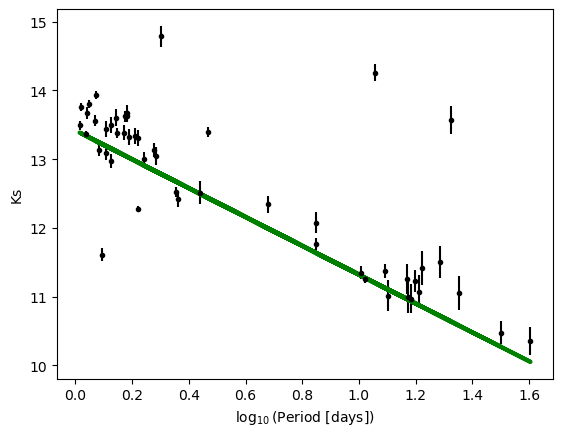

In [8]:
# Evaluating the fit at out particular x axis by doing best_fit(x)

plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=3)  
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')
plt.show()

### Fitting the same data with `Polynomial1D(degree=1)`

In [9]:
# Step 1: Model
model_poly = models.Polynomial1D(degree=1)

In [10]:
# Step 2: Fitter
fitter_poly = fitting.LinearLSQFitter()

In [11]:
# Step 3: Fit data

best_fit_poly = fitter_poly(model_poly, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                  c1        
    ------------------ -------------------
    13.418358846900365 -2.0981402575088968


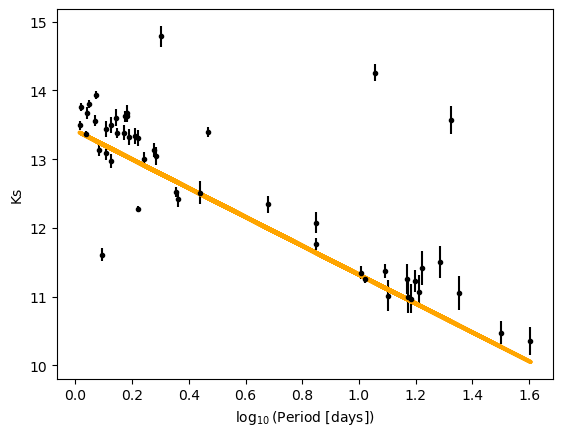

In [12]:
# Plotting
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit_poly(log_period), color='orange', linewidth=3)  
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')
plt.show()

As we can see, modeling can be done with a simple 3 steps:
1. Choosing the Model
2. Choosing the Fitter
3. Fitting the data

#### Analysis and difference between Poly and Linear:

To be done...

### 2) Fitting a Polynomial Model:

Now we will fit data to a Polynomial model of more than 1 degree. Using fake data, we will add gaussian noise wit the function `np.random.normal(0,2)` which gives a random number from a gaussian distribution with mean 0 and std 2.

In [13]:
N  = 100                    # number of elements
x1 = np.linspace(0, 4, N)   # Makes an array from 0 to 4 of N elements
y1 = x1**3 - 6*x1**2 + 12*x1 - 9    #function to be fitted

# Adding some noise to the data:
y1 += np.random.normal(0, 2, size=len(y1)) #One way to add random gaussian noise
sigma  = 1.5
y1_err = np.ones(N)*sigma # error on y1

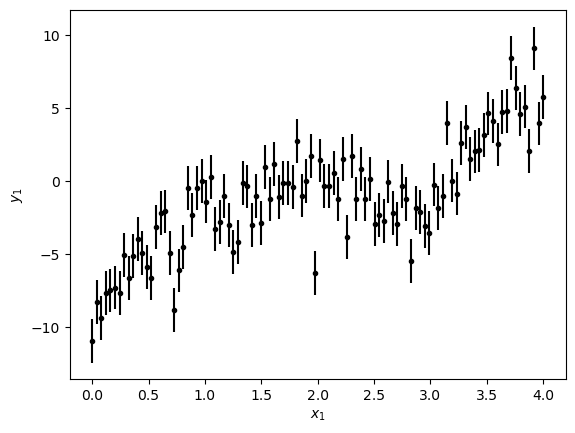

In [14]:
# plotting:

plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.xlabel('$x_1$')  
plt.ylabel('$y_1$')
plt.show()

In [15]:
# Using the 3 steps process shown above, we can fit the data

model_poly2 = models.Polynomial1D(degree=3)   # notice the 3rd degree because y1 a cube function
fitter_poly2 = fitting.LinearLSQFitter() 
best_fit_poly2 = fitter_poly(model_poly2, x1, y1, weights = 1.0/y1_err**2)

In [16]:
print(best_fit_poly2)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
             c0                 c1                c2                 c3       
    ------------------- ----------------- ------------------ -----------------
    -10.011896701866768 13.80593178356952 -7.004119237301699 1.161738518351412


We can compare results using a different fitter. This can help us determine which fitter might be more appropiate:

In [17]:
fitter_poly_simp = fitting.SimplexLSQFitter()
best_fit_poly_simp = fitter_poly_simp(model_poly2, x1, y1, weights = 1.0/y1_err**2)

In [18]:
print(best_fit_poly_simp)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
             c0                  c1                c2                c3        
    -------------------- ----------------- ----------------- ------------------
    -0.17781077295336417 0.521786756099123 -1.71168382572402 0.5152788772786938


In this case, the fitter doesn't work correctly because the model is linear. `SimplexLSQFitter` works better with models that are not linear in the parameters. The fitter is not working properly for this kind of function.

#### Comparing results:

One way to One way to check which model parameters are a better fit is calculating the Reduced Chi Square Value. We can define a function to do that because we're going to use it several times.

In [19]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [20]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly2(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with LinearLSQFitter: {}'.format(reduced_chi_squared))

Reduced Chi Squared with LinearLSQFitter: 1.749782269675277


In [21]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly_simp(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with SimplexLSQFitter: {}'.format(reduced_chi_squared))

Reduced Chi Squared with SimplexLSQFitter: 5.40366727216543


As we can see, the _Reduced Chi Square_ for the first fit is closer to one, which means this fit is better. Note that this is what we expected after the discussion of the warnings.

We can also compare them visually:

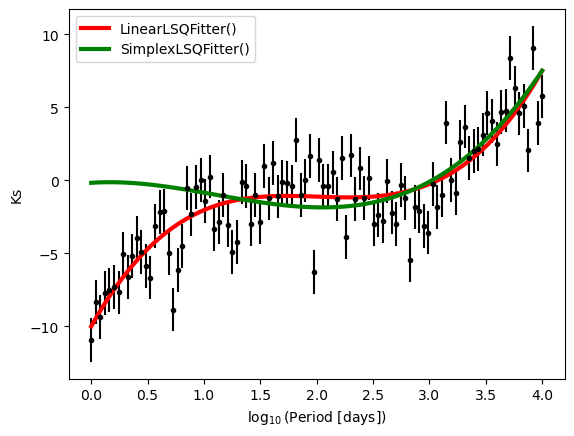

In [22]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.plot(x1, best_fit_poly2(x1), color='r', linewidth=3, label='LinearLSQFitter()')  
plt.plot(x1, best_fit_poly_simp(x1), color='g', linewidth=3, label='SimplexLSQFitter()')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')
plt.legend()
plt.show()

Results are as espected, the fit performed with the linear fitter is better than the second, non linear one. This is why we should pay attention when we choose a fitter, and learn about the different types so we can select the most appropiate one.

**Conclusion:** We can choose the method most convenient for every case we need to fit. `astropy.modeling` is recommended because is easier to write the name of the function we want to fit than to remember the expression every time we want to use it. Also, `astropy.modeling` becomes useful with more complicated models like two gaussians plus a black body, and is specially created to be used with astronomical data.

### 3) Exercise, choosing model and fitter

For this example, we are given the sin function and we have to determine which is the bet model and fitter to use. We will use different ones and compare the results

In [23]:
N3 = 100
x3 = np.linspace(0, 3, N3)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])
sigma = 1.5
y3_err = np.ones(N)*sigma 

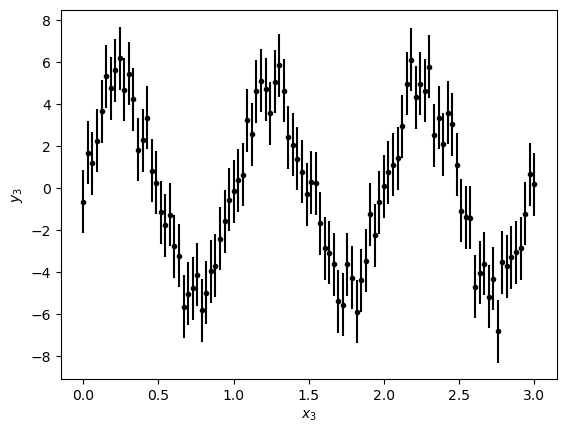

In [24]:
# Plotting:

plt.errorbar(x3, y3, yerr=y3_err, fmt='k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')
plt.show()

In [25]:
# Following the 3 step process:

# Using linear model and fitter:
# 1. Choose model:
model_ex = models.Linear1D()

#2. Choose fitter:
fitter_ex = fitting.LinearLSQFitter()

#3. Fit data:
best_fit_ex = fitter_ex(model_ex, x3, y3, weights = 1.0/y3_err**2)

In [26]:
print(best_fit_ex)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -0.9346405842459117 1.4342242203580524


In [65]:
# Using polynomial model and fitter:
# 1. Choose model:
model_ex_poly = models.Polynomial1D(degree=3)

#2. Choose fitter:
fitter_ex_poly = fitting.LinearLSQFitter()

#3. Fit data:
best_fit_ex_poly = fitter_ex_poly(model_ex_poly, x3, y3, weights = 1.0/y3_err**2)

In [66]:
print(best_fit_ex_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                 c2                c3        
    ----------------- ------------------- ----------------- ------------------
    4.292893286188403 -12.187506997744384 9.191139693564534 -2.008167072061771


In [106]:
# Using Gaussian model and LMLSQfitter:
# 1. Choose model:
model_ex_gau = models.Gaussian1D()

#2. Choose fitter:
fitter_ex_gau = fitting.LMLSQFitter() #cannot use linear because Gaussian is not linear

#3. Fit data:
best_fit_ex_gau = fitter_ex_gau(model_ex_gau, x3, y3, weights = 1.0/y3_err**2)

In [107]:
print(best_fit_ex_gau)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    5.931859981859604 0.23565815350021135 0.1085955362878742


In [108]:
# Using Sine model and fitter:
# 1. Choose model:
model_ex_sine = models.Sine1D()

#2. Choose fitter:
fitter_ex_sine = fitting.LMLSQFitter()

#3. Fit data:
best_fit_ex_sine = fitter_ex_sine(model_ex_sine, x3, y3, weights = 1.0/y3_err**2)

In [109]:
print(best_fit_ex_sine)

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude         frequency               phase         
    ----------------- ------------------ -----------------------
    4.917591827527633 1.0013589232835334 -0.00022803124773445097


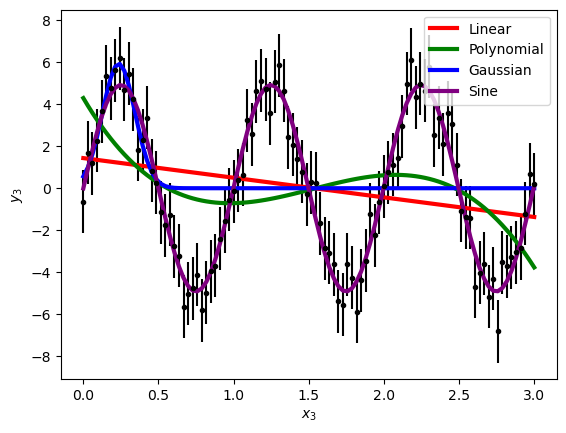

In [110]:
plt.errorbar(x3, y3, yerr=y3_err,fmt='k.')
plt.plot(x3, best_fit_ex(x3), color='r', linewidth=3, label='Linear')  
plt.plot(x3, best_fit_ex_poly(x3), color='g', linewidth=3, label='Polynomial')
plt.plot(x3, best_fit_ex_gau(x3), color='b', linewidth=3, label='Gaussian')
plt.plot(x3, best_fit_ex_sine(x3), color='purple', linewidth=3, label='Sine')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')
plt.legend()
plt.show()

In [111]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_ex(x3), x3, y3, y3_err, N, 4)
print('Reduced Chi Squared with LinearLSQFitter: {}'.format(reduced_chi_squared))

Reduced Chi Squared with LinearLSQFitter: 5.5575155504163245


In [112]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_ex_poly(x3), x3, y3, y3_err, N, 4)
print('Reduced Chi Squared with Polynomial1D: {}'.format(reduced_chi_squared))

Reduced Chi Squared with Polynomial1D: 5.036768715649127


In [113]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_ex_gau(x3), x3, y3, y3_err, N, 4)
print('Reduced Chi Squared with Gaussian1D: {}'.format(reduced_chi_squared))

Reduced Chi Squared with Gaussian1D: 4.833230770163094


In [114]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_ex_sine(x3), x3, y3, y3_err, N, 4)
print('Reduced Chi Squared with Sine1D: {}'.format(reduced_chi_squared))

Reduced Chi Squared with Sine1D: 0.33296502547388207


As we can see, choosing the best model and fitter comes with practice and experience. Choosing the right shape that apats and fits best to the data can come from the experience of using different models. In this case, we can see that the Reduced Chi is at a minimum using the Sine model with the LevMarLSQFitter. 

41.842335 106595.22
[0.9996699 1.0003825 1.0001546 ... 1.001422  0.9993011 0.9994306] [1.2414656 1.2421666 1.243359  ... 1.2466111 1.2436031 1.2437819]


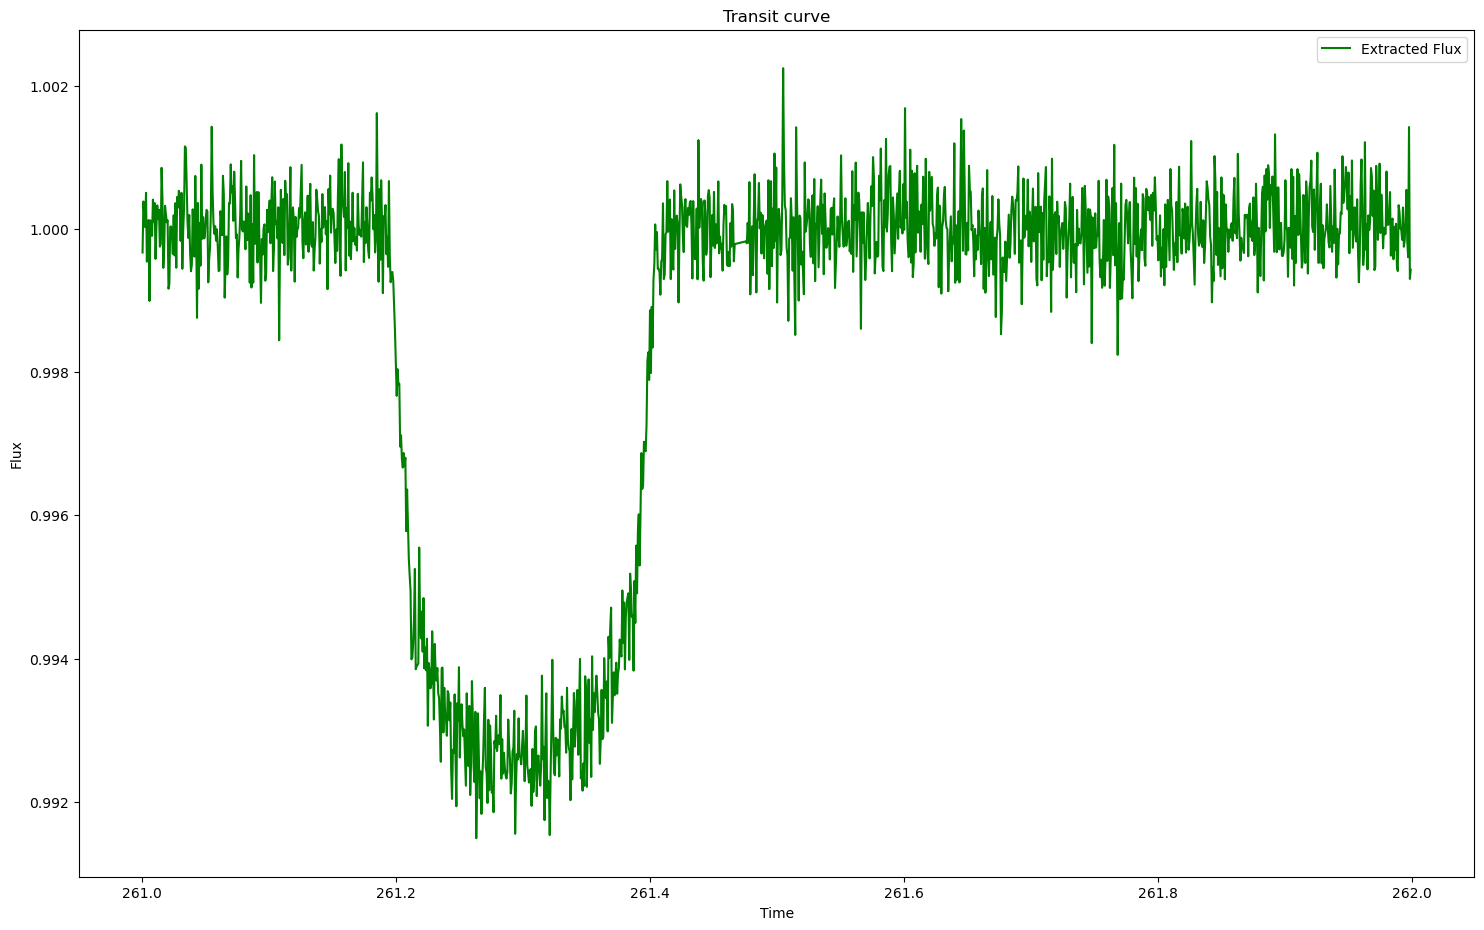

In [118]:
# trying to use it for the solution of problem set 7:

import lightkurve as lk
import numpy as np
import math as m
import scipy.integrate as integrate

import matplotlib.pyplot as plt
%matplotlib inline                  

# Make displayed plots larger
plt.rcParams['figure.figsize'] = [18, 11]

def get_lightcurve(name):
    lcs      = lk.search_lightcurve(name, mission="Kepler", cadence="short").download_all()
    time     = np.array(lcs[0].time.value)          # get the time of each observation
    flux     = np.array(lcs[0].flux.value.data)     # get the flux
    flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux
    return (time, flux, flux_err)

(time, flux, flux_err) = get_lightcurve("Kepler-7b")

# Obtaining time, flux and flux error for a certain time:

def masking (ti, tf):
    mask = np.logical_and(time>ti, time<tf) # np.logical_and allows you to have 2 conditions on the mask
    time_range  = time[mask]                 # ti, obtains the values of time between 261 and 262
    flux_range  = flux[mask]                 # Fi, flux range
    f_err_range = flux_err[mask]             # uncertainty in the flux
    return (time_range, flux_range, f_err_range)

time_range, flux_range, f_err_range = masking(261,262)

# Obtaining Average and Standard Deviation from extracted flux values:

def mean(flx):
    mean_flx = np.mean(flx)    # F bar prime, mean of the extracted flux values
    return mean_flx

def standard_d(flx):    
    st_dev_flx = np.std(flx)  # sigma prime, standard deviation of the extracted flux values
    return st_dev_flx


# Excluding transit from flux data:


def two_sigma(flx):
    actual_flux = []                                  # array of fluxes excluding the transit    

    # Removing points:
    for i in range(len(flx)):
        excluded_points = m.fabs(flx[i] - mean(flx))/standard_d(flx) # removing points
        if excluded_points < 2:
            actual_flux.append(flx[i])
    accurate_flux = actual_flux
    return accurate_flux


# Iterating to obtain a good estimate of the resulting values:

def iterations(flx, k):
    
    for j in range (k):
    
        accurate_flux = two_sigma(flx)   # Starts excluding data and retrieves a new flux
        flx = accurate_flux              # So the next iteration will be with the new values
        
    return accurate_flux


# Obtaining last mean and standard deviation:

final_flux = iterations(flux_range, 5)
std_d_prime = standard_d(final_flux)  # Std deviation double prime i.e. "final"
F_bar       = mean(final_flux)        # Mean double prime i.e. "final"


# Normalizing:

norm_flux     = flux_range/F_bar           # Normalized Flux (Fi)
norm_flux_err = f_err_range/std_d_prime    # Normalized Uncertainty in the flux (sigmaF,i)

# Plotting data and the predicted transit curve on top of each other:

def graph(x_axis, y_axis, name, c, tlt ):
    plt.title(tlt)
    plt.plot(x_axis, y_axis, label = name, color = c)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.legend(loc="best")
    plt.show()
    return


graph(time_range, norm_flux, "Extracted Flux", "Green", "Transit curve")

In [145]:
# Using Gaussian model and LMLSQfitter:
# 1. Choose model:
model_ex_ps7 = models.Lorentz1D()

#2. Choose fitter:
fitter_ex_ps7 = fitting.LMLSQFitter() 

#3. Fit data:
best_fit_ps7 = fitter_ex_gau(model_ex_ps7, time_range, norm_flux) #weights = norm_flux_err)

In [146]:
print(best_fit_ps7)

Model: Lorentz1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             x_0                fwhm      
    ------------------ ------------------ -----------------
    11.123656973915974 -533.3296120291983 499.2602770988698


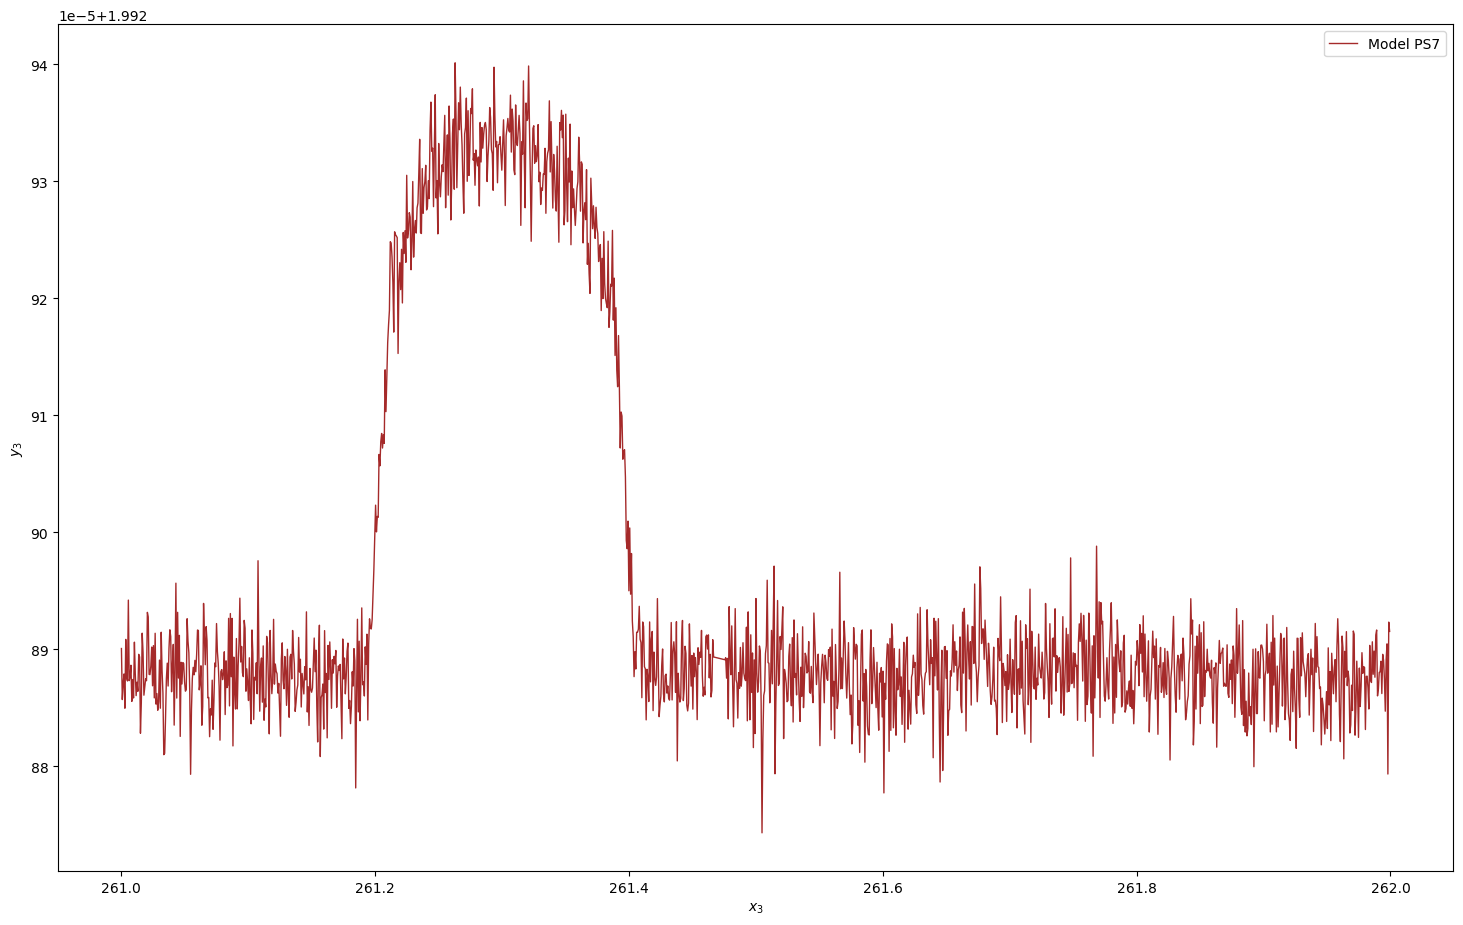

In [147]:
#plt.errorbar(time_range, norm_flux, yerr=norm_flux_err)
plt.plot(time_range, best_fit_ps7(norm_flux), color='brown', linewidth=1, label='Model PS7')  
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')
plt.legend()
plt.show()

In [149]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_ps7(time_range), time_range, norm_flux, norm_flux_err, len(time_range), 2)
print('Reduced Chi Squared with Astropy: {}'.format(reduced_chi_squared))

Reduced Chi Squared with Astropy: 5.771234178671378e-06


Using a Lorentz model to fit the data, we receive a Chi Square value error or 10^-6. This mean the model is highly accurate to what the data shows. Through less steps and a more straightforward, easy to follow code, we achieve higher results than the ones obtained in class or during the PS7 solution.

## Citation and awknowledgment:

1. This work made use of Astropy:\footnote{http://www.astropy.org} a community-developed core Python package and an ecosystem of tools and resources for astronomy \citep{astropy:2013, astropy:2018, astropy:2022}.

2. "Make a quick fit using astropy.modeling", Astropy project,Rocio Kiman, Lia Corrales, Zé Vinícius, Kelle Cruz, Stephanie T. Douglas, https://learn.astropy.org/tutorials/Models-Quick-Fit.html
3. "Create a User DEfined Model using astropy.modeling", Astropy project, Rocio Kiman, Lia Corrales, Zé Vinícius, Stephanie T. Douglas https://learn.astropy.org/tutorials/User-Defined-Model.htmls/2022ApJ...935..167A},
      adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}
